In [2]:
# imports
import re
import ast
import time
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import os
from pandas import ExcelWriter
from pandas import ExcelFile

In [43]:
#Load in the data
df = pd.read_excel('/Users/Shailesh/Desktop/MIDS/Capstone/w210CapstoneProject/capstone_data-version-2.xlsx', sheetname='output')

### Exploratory Data Analysis

In [4]:
print("Column headings:")
print(df.columns)

Column headings:
Index(['age', 'gender', 'racecaucasian', 'raceblack', 'raceasian',
       'racenativeam', 'racnativepacific', 'raceother', 'ethnicity', 'surgdt',
       ...
       'cotother', 'Readmit', 'ReadmitDt', 'readmrsn', 'cnstroktrind',
       'CNStrokT', 'drgnum', 'BldRBC', 'predstro', 'predrenf'],
      dtype='object', length=407)


In [5]:
df.head()

,age,gender,racecaucasian,raceblack,raceasian,racenativeam,racnativepacific,raceother,ethnicity,surgdt,...,cotother,Readmit,ReadmitDt,readmrsn,cnstroktrind,CNStrokT,drgnum,BldRBC,predstro,predrenf
0,54,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2011-07-01,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.014,0.048
1,65,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2011-07-02,...,2.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.017,0.069
2,83,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2011-07-04,...,2.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.045,0.148
3,59,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2011-07-05,...,2.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.013,0.074
4,72,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2011-07-06,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.016,0.019


There are 42,746 records in this dataset. There are 407 columns.

In [44]:
df.loc[df['complics']==2,['coprebld','coprebldtim', 'copregft','CReintMI','CReintMIVes','CReintMIIntTy','CAortReint','CAortReintTy','copreoth','coprenon','csepsis','csepsispbc','cnstrokp','cnstrokttia','cncomaenceph','CNEnceph','cncoma','cnparal','cnparesis','CNParesisTy','cpvntlng','cppneum','cvte','pulmemb','dvt','crenfail','crendial','dialdur','DialStat','cultrafil','cotarrst','CVaAoDisTy','cotcoag','cottamp','cotgi','COtLiver','cotmsf','cotafib','cotother']] =2 

In [45]:
subset = df.filter(items = ['coprebld','coprebldtim', 'copregft','CReintMI','CReintMIVes','CReintMIIntTy','CAortReint','CAortReintTy','copreoth','coprenon','csepsis','csepsispbc','cnstrokp','cnstrokttia','cncomaenceph','CNEnceph','cncoma','cnparal','cnparesis','CNParesisTy','cpvntlng','cppneum','cvte','pulmemb','dvt','crenfail','crendial','dialdur','DialStat','cultrafil','cotarrst','CVaAoDisTy','cotcoag','cottamp','cotgi','COtLiver','cotmsf','cotafib','cotother']) 

In [46]:
subset.fillna(2, inplace = True)

In [48]:
df.iloc[:,359:397] = subset.iloc[:,:]

In [51]:
df.to_excel("/Users/Shailesh/Desktop/MIDS/Capstone/w210CapstoneProject/capstone_data_filled_in_complication_data.xlsx",sheet_name='output')

In [52]:
df2 = pd.read_excel('/Users/Shailesh/Desktop/MIDS/Capstone/w210CapstoneProject/capstone_data_filled_in_complication_data.xlsx', sheetname='output')

In [65]:
df['strokeBin'] = df['cnstrokp']

In [67]:
df.loc[df['strokeBin'] == 2, ['strokeBin']]=0

In [69]:
df.loc[df['strokeBin'] > 0, ['strokeBin']]=1

In [71]:
max(df['strokeBin'])

1.0

In [72]:
df.to_excel("/Users/Shailesh/Desktop/MIDS/Capstone/w210CapstoneProject/capstone_data_binarized_outcome.xlsx",sheet_name='output')

In [73]:
df2 = pd.read_excel('/Users/Shailesh/Desktop/MIDS/Capstone/w210CapstoneProject/capstone_data_binarized_outcome.xlsx', sheetname='output')

From the below summary, we can see patients tend to be middle-aged, male, and white

In [76]:
df.describe()

,recordId,age,gender,racecaucasian,raceblack,raceasian,racenativeam,racnativepacific,raceother,ethnicity,...,cotother,Readmit,readmrsn,cnstroktrind,CNStrokT,drgnum,BldRBC,predstro,predrenf,strokeBin
count,42746.00000,42746.000000,42743.000000,42299.000000,42298.000000,42299.000000,42299.000000,42298.000000,42272.000000,42718.000000,...,42740.000000,18781.000000,5080.00000,0.0,0.0,0.0,0.0,42743.000000,41692.000000,42746.000000
mean,21373.50000,66.186497,1.293896,1.098324,1.927893,1.990118,1.995555,1.998605,1.990254,2.031743,...,1.951614,1.891539,349.84252,NaN,NaN,NaN,NaN,0.014555,0.045228,0.014434
std,12339.85164,10.914178,0.455550,0.297756,0.258669,0.098917,0.066520,0.037322,0.098243,0.253955,...,0.214582,0.332165,468.75638,NaN,NaN,NaN,NaN,0.011728,0.055454,0.119273
min,1.00000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.00000,NaN,NaN,NaN,NaN,0.001000,0.002000,0.000000
25%,10687.25000,59.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,3.00000,NaN,NaN,NaN,NaN,0.007000,0.014000,0.000000
50%,21373.50000,67.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,22.00000,NaN,NaN,NaN,NaN,0.011000,0.026000,0.000000
75%,32059.75000,74.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,998.00000,NaN,NaN,NaN,NaN,0.019000,0.054000,0.000000
max,42746.00000,98.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,...,2.000000,3.000000,999.00000,NaN,NaN,NaN,NaN,0.213000,0.886000,1.000000


In [77]:
df.head()

,recordId,age,gender,racecaucasian,raceblack,raceasian,racenativeam,racnativepacific,raceother,ethnicity,...,Readmit,ReadmitDt,readmrsn,cnstroktrind,CNStrokT,drgnum,BldRBC,predstro,predrenf,strokeBin
0,1,54,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.014,0.048,0
1,2,65,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.017,0.069,0
2,3,83,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.045,0.148,0
3,4,59,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.013,0.074,0
4,5,72,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.016,0.019,0


Next, let's examine how sparse our dataset is.

In [78]:
df_missing = df.isnull().mean().round(4) * 100
df_missing = df_missing.to_frame()
df_missing.columns = ['% null']

In [79]:
df_missing.head()

,% null
recordId,0.00
age,0.00
gender,0.01
racecaucasian,1.05
raceblack,1.05


148 of our variables have 90+% of their rows filled with data. There are 164 variables with at least 50% of their rows containing data. There are 174 variables that have data for less than 10% of their rows.

In [81]:
df_missing[df_missing < 10].count()

% null    148
dtype: int64

In [84]:
df_missing[df_missing < 50].count()

% null    164
dtype: int64

In [85]:
df_missing[df_missing > 90].count()

% null    174
dtype: int64

Based on the above, we know that the majority of features have greater than 50% of their values missing. We can see the distribution of null values by variable below

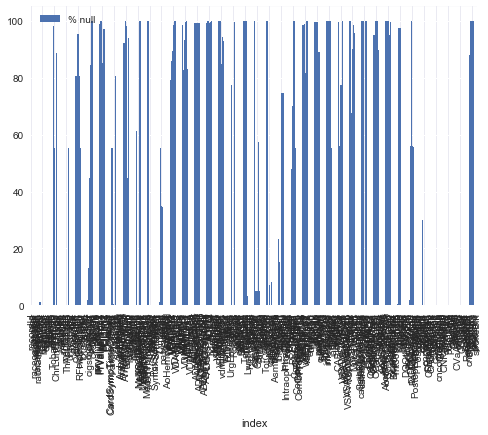

In [80]:
#Show % null values by variable

plt.figure(figsize=(4,4))
df_missing.reset_index().plot(kind='bar', x= 'index', y='% null')
plt.show()

Examing our outcome variable, we can see the vast majority of patients we have data on do not suffer from stroke post-operation.

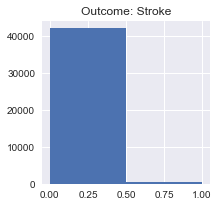

In [86]:
#Show distribution of outcome variable

df['strokeBin'].hist(figsize=(3,3),bins=2)
plt.title('Outcome: Stroke')
plt.show()

Only 1.4% of our records have a patient suffering a stroke complication

In [90]:
df['strokeBin'].sum()/df['strokeBin'].count()*100

1.4434099096991533

In [93]:
### EDA ideas

# Heatmap to get correlations between features
# Histograms to get feature distributions
# Plots of relationship between outcome variable and features

From the below heatmap, there appear to be some variables that correlate with others (horizontal or vertical lines). Most of the variables show no correlation or have no data present

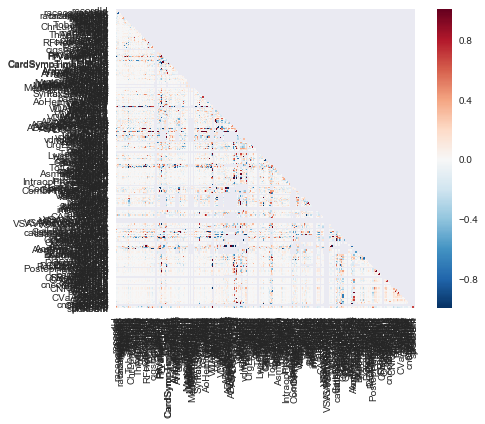

In [91]:
# correlation heatmap
nfv_values_corr = df.corr()
mask = np.zeros_like(nfv_values_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(nfv_values_corr,  mask = mask, square = True)
plt.show()

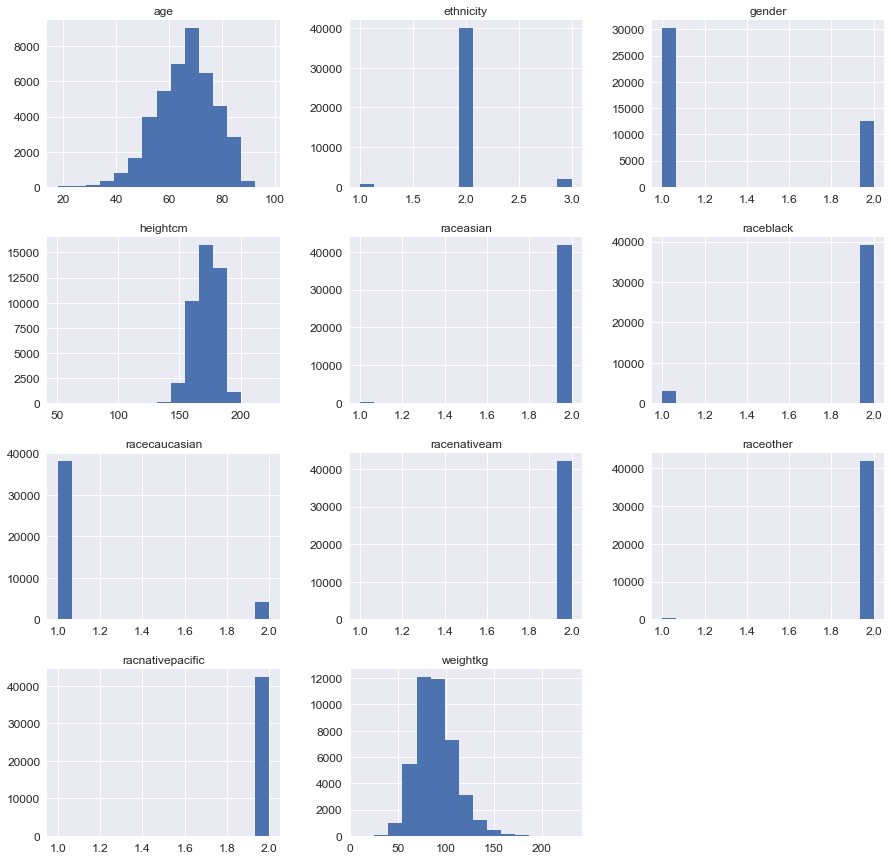

In [96]:
#Demographic histograms
hist1 = df[df.columns[1:14]].hist(figsize=(15,15), bins=15, xlabelsize = 12, ylabelsize = 12)
plt.show()

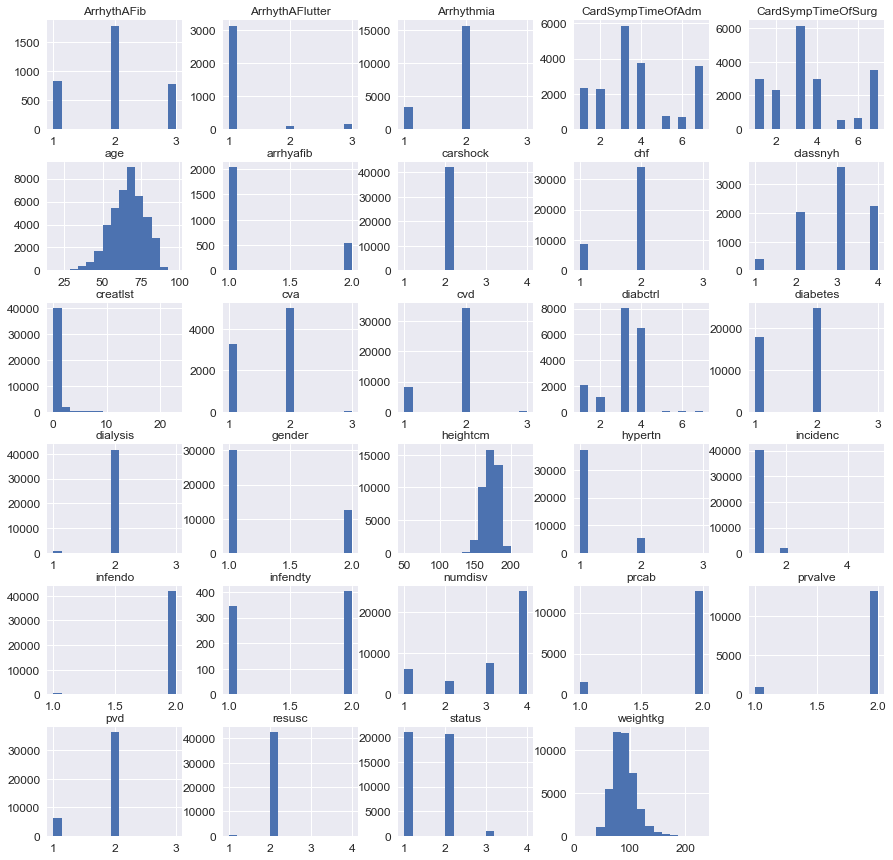

In [106]:
#STS risk model variable histograms
hist1 = df.iloc[:,[1,2,12,13,14,15,17,18,19,20,33,37,38,47,59,60,76,77,73,74,79,80,81,84,85,89,112,181,182]].hist(figsize=(15,15), bins=15, xlabelsize = 12, ylabelsize = 12)
plt.show()

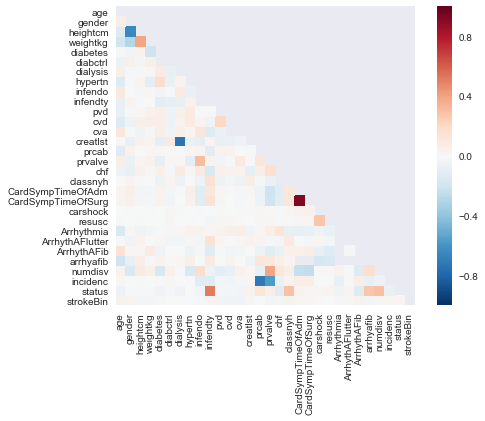

In [110]:
# correlation heatmap for STS risk model variables and outcome variable

STS_df = df.iloc[:,[1,2,12,13,14,15,17,18,19,20,33,37,38,47,59,60,76,77,73,74,79,80,81,84,85,89,112,181,182, 408]]

hash_values_corr = STS_df.corr()
hash_mask = np.zeros_like(hash_values_corr)
hash_mask[np.triu_indices_from(hash_mask)] = True

sns.heatmap(hash_values_corr,  mask = hash_mask, square = True)
plt.show()

The following plot breaks down the portion of records that were positive and negative for the stroke outcome variable by each of the independent variables. The variables whose values are mostly null have shorter bars as there are fewer data points.

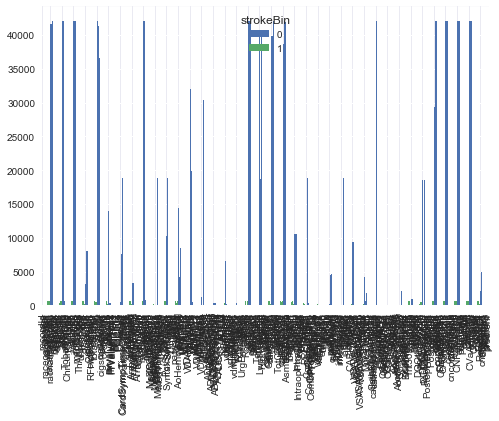

In [111]:
stroke_per_feature = df.groupby(df.columns[408]).count()
stroke_per_feature.iloc[:,:].transpose().plot(kind='bar')
plt.show()

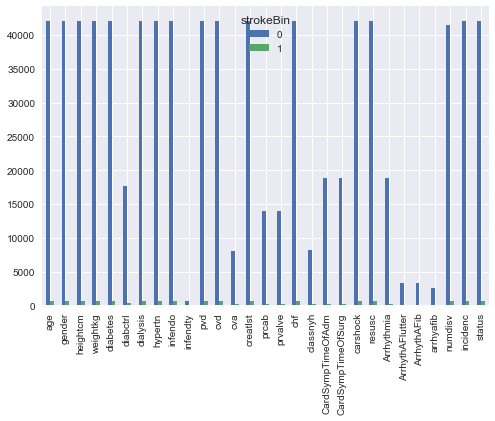

In [115]:
stroke_per_feature = STS_df.groupby(STS_df.columns[29]).count()
stroke_per_feature.iloc[:,:].transpose().plot(kind='bar')
plt.show()

In [114]:
STS_df.describe()

,age,gender,heightcm,weightkg,diabetes,diabctrl,dialysis,hypertn,infendo,infendty,...,carshock,resusc,Arrhythmia,ArrhythAFlutter,ArrhythAFib,arrhyafib,numdisv,incidenc,status,strokeBin
count,42746.000000,42743.000000,42744.000000,42743.000000,42742.000000,17955.000000,42739.000000,42746.000000,42744.000000,751.000000,...,42745.000000,42745.000000,19141.000000,3399.000000,3402.000000,2580.000000,42167.000000,42744.000000,42743.000000,42746.000000
mean,66.186497,1.293896,171.461597,89.505278,1.580015,3.093066,1.975947,1.128246,1.982313,1.537949,...,2.002737,2.000819,1.825505,1.124154,1.986479,1.208527,3.221429,1.059119,1.532181,0.014434
std,10.914178,0.455550,10.755193,20.469631,0.494462,0.992101,0.156689,0.335764,0.131812,0.498890,...,0.142558,0.104969,0.388120,0.448530,0.689608,0.406334,1.102441,0.258655,0.545902,0.119273
min,18.000000,1.000000,50.500000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,59.000000,1.000000,165.000000,75.500000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000,...,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
50%,67.000000,1.000000,172.700000,87.300003,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,4.000000,1.000000,2.000000,0.000000
75%,74.000000,2.000000,178.000000,101.100000,2.000000,4.000000,2.000000,1.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,4.000000,1.000000,2.000000,0.000000
max,98.000000,2.000000,223.500000,231.000000,3.000000,7.000000,3.000000,3.000000,2.000000,2.000000,...,4.000000,4.000000,3.000000,3.000000,3.000000,2.000000,4.000000,5.000000,4.000000,1.000000


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


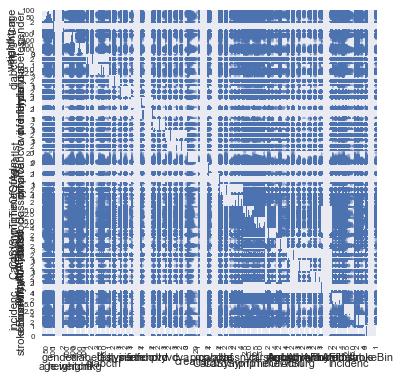

In [116]:
pd.scatter_matrix(STS_df, figsize=(6, 6))
plt.show()

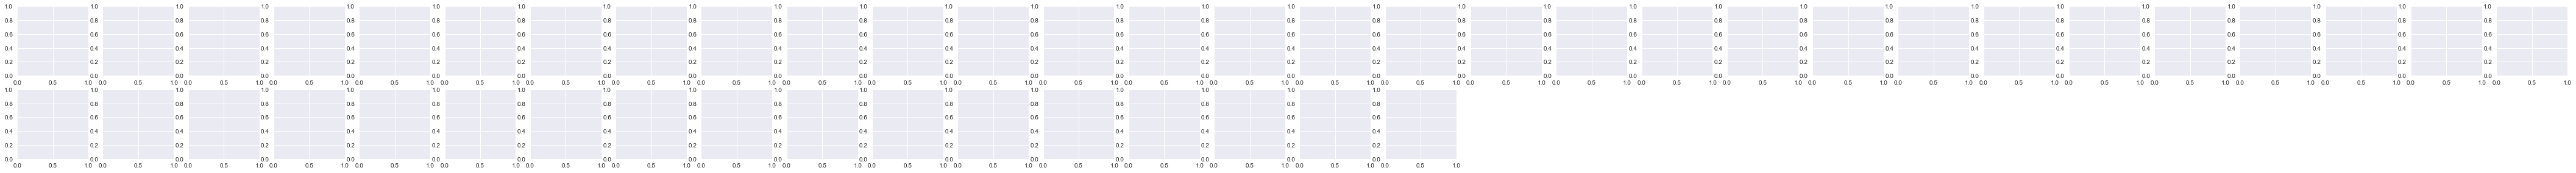

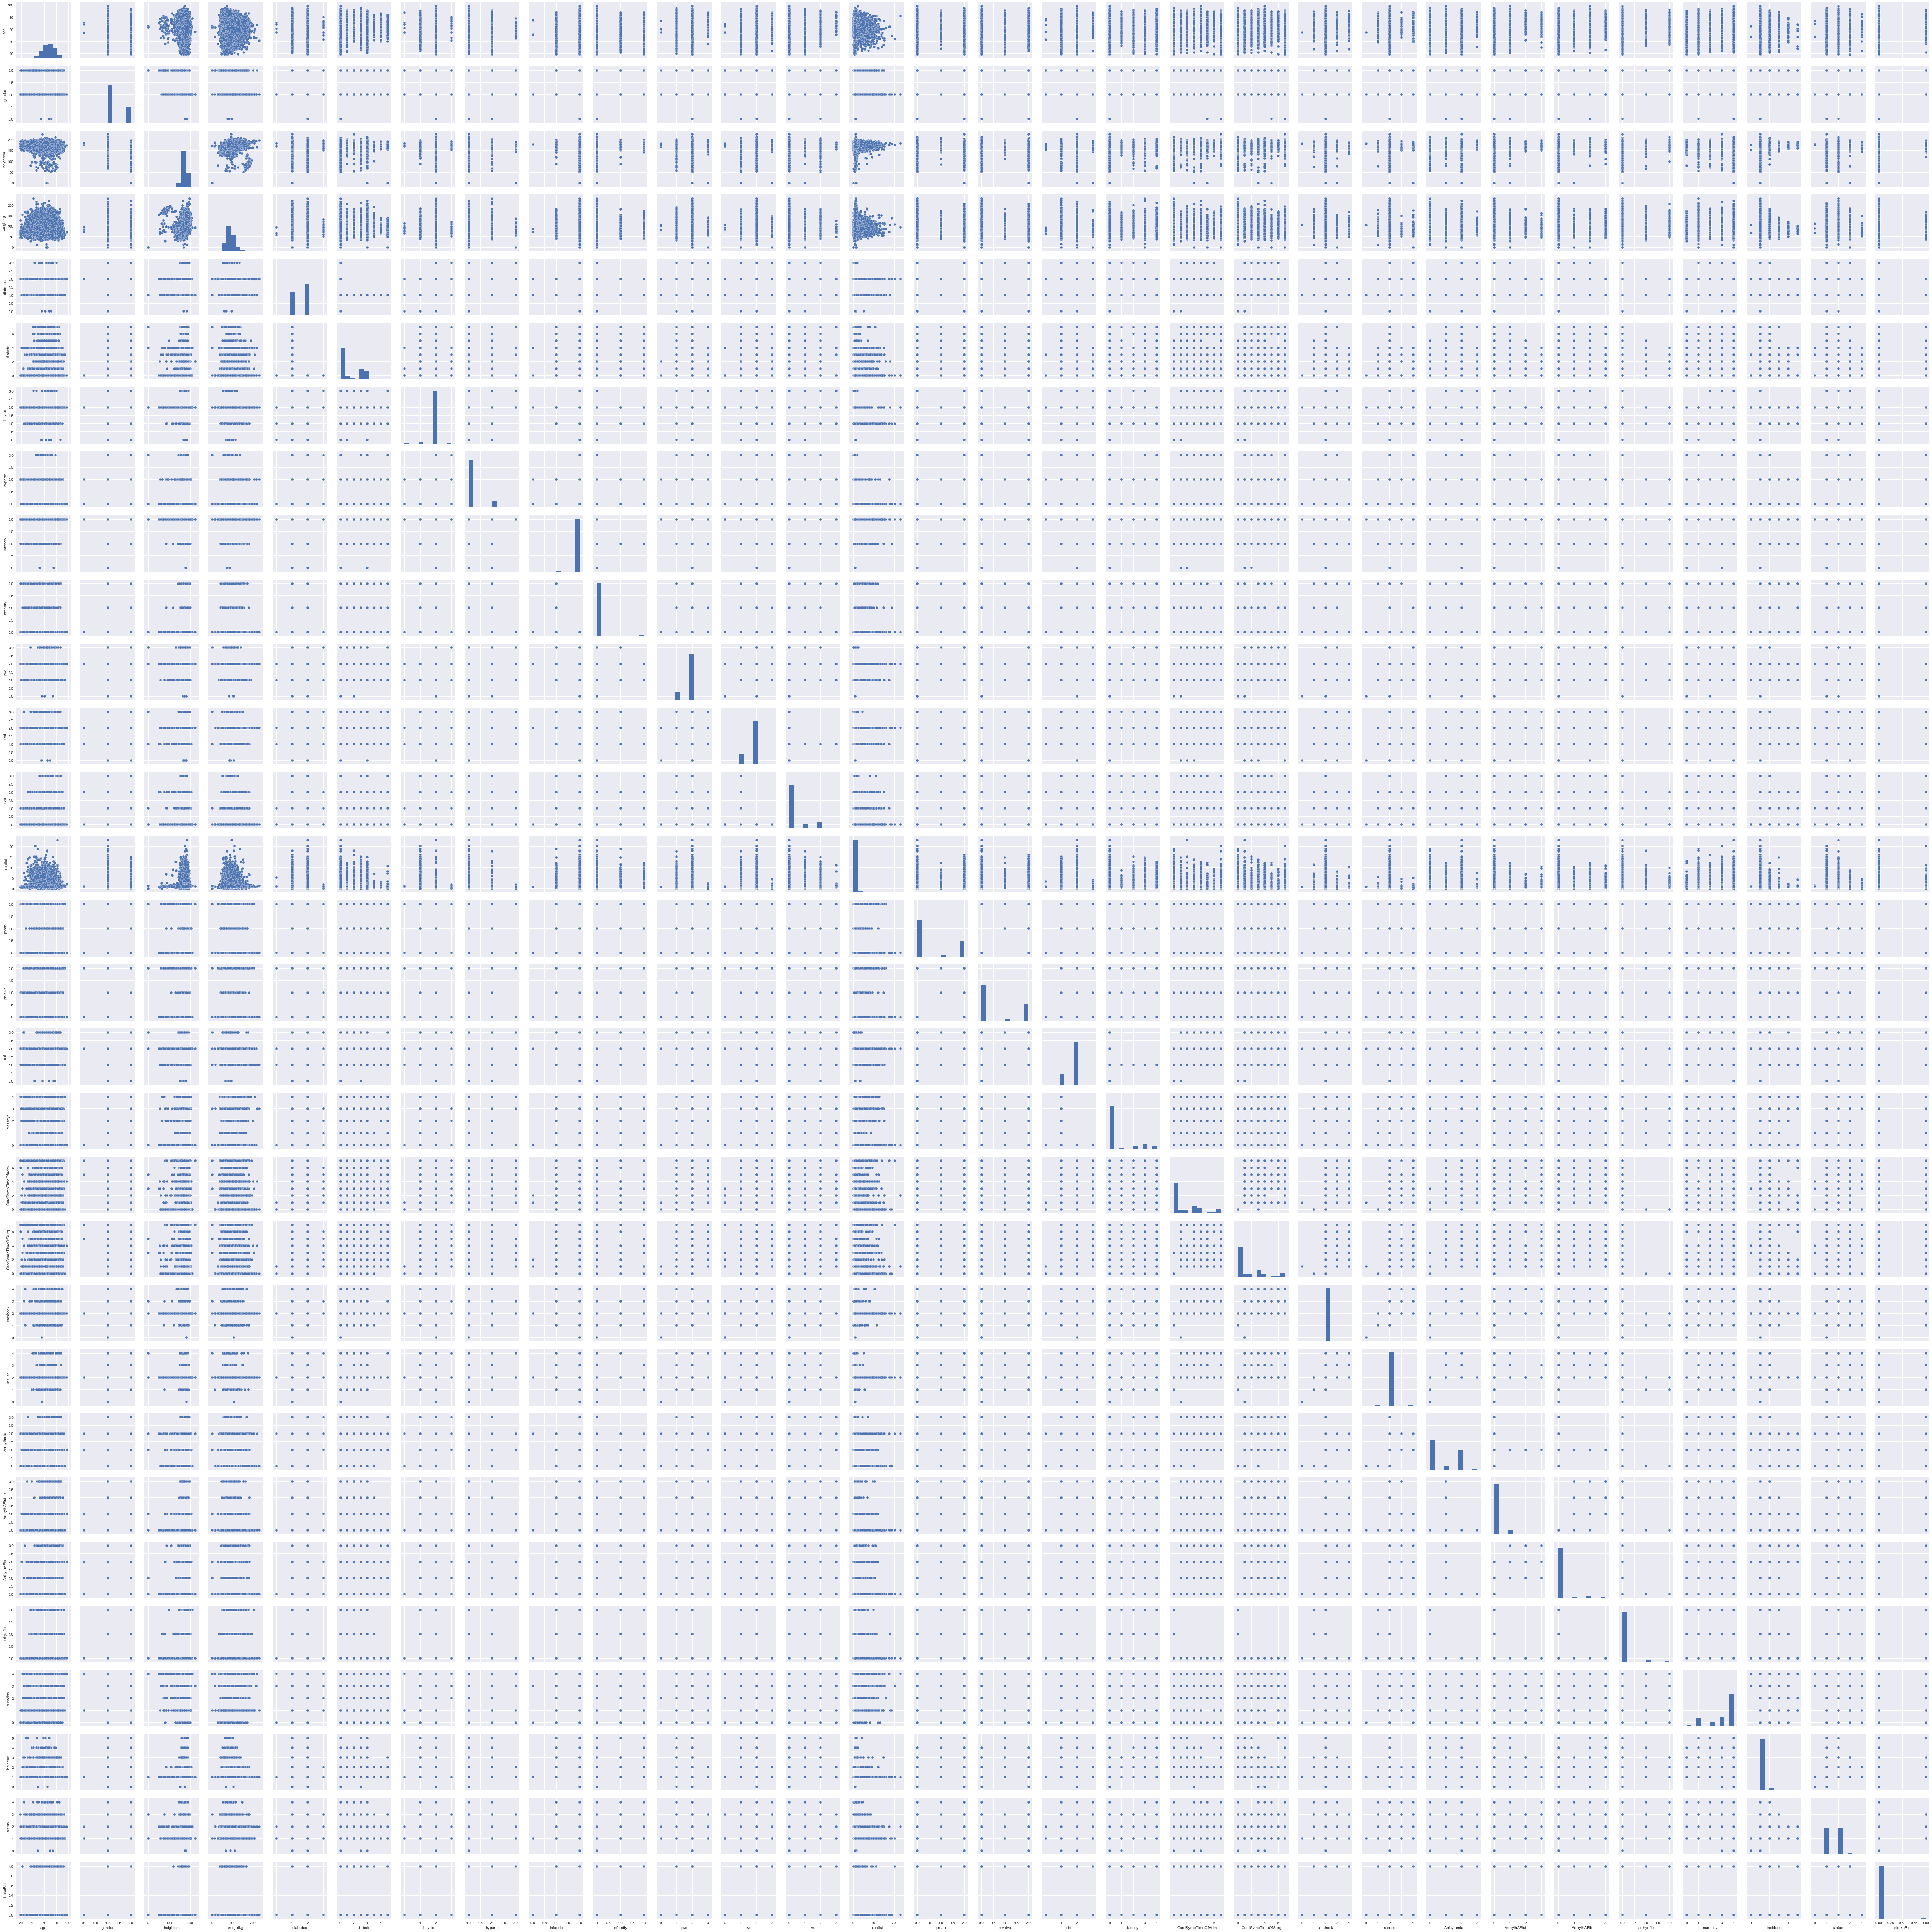

In [120]:
sns.pairplot(STS_df.fillna(0))
plt.show()